# Problem Statement:
## Customer Personality Analysis

In this project, we aim to perform an in-depth analysis of customer behavior and preferences. By leveraging exploratory data analysis (EDA), univariate and bivariate analysis, as well as unsupervised learning techniques, we seek to gain valuable insights into customer segments.

## Goal:
Perform clustering to summarize customer segments.

## Purpose / Business Implementation:
The primary objective of this analysis is to help the business gain a comprehensive understanding of its customers, including their habits, behavior, and needs. By segmenting customers based on their characteristics, the business can tailor its products and services to meet the specific needs of each segment.

Customer segmentation plays a crucial role in optimizing marketing strategies, product development, and customer relationship management. By identifying distinct customer segments, businesses can effectively allocate resources, personalize marketing campaigns, and enhance customer satisfaction.

## Data Source:
SAS Institute
## Collection Method:
Business Analytics Using SAS Enterprise Guide and SAS Enterprise Miner.

## TABLE OF CONTENTS:
* [LOAD DATA](#LOAD-DATA)
* [DATA CLEANING](#DATA-CLEANING)
* [FEATURE ENGINEERING](#FEATURE-ENGINEERING)
* [UNIVARIATE ANALYSIS](#UNIVARIATE-ANALYSIS)
* [FEATURE CORRELATION](#FEATURE-CORRELATION)
* [BIVARIATE ANALYSIS](#BIVARIATE-ANALYSIS)
* [CLUSTERING](#CLUSTERING)
* [MODEL EVALUATION](#MODEL-EVALUATION)
* [CLUSTERING SUMMARY](#CLUSTERING-SUMMARY)

In [114]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
# Ignoring Warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
# Setting Seed for Reproducibility
np.random.seed(123) 

# LOAD DATA

In [21]:
# Loading data
data = pd.read_csv("Dataset\marketing_campaign.csv", sep="\t")

In [22]:
# Looking at the first five rows
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Customer Data Attributes

### People
- **ID**: Customer's unique identifier
- **Year-Birth**: Customer's birth year
- **Education**: Customer's education level
- **Marital_Status**: Customer's marital status
- **Income**: Customer's yearly household income
- **Kidhome**: Number of children in customer’s household
- **Teenhome**: Number of teenagers in customer’s household
- **Dt_Customer**: Date of customer’s enrollment with the company
- **Recency**: Number of days since customer’s last purchase
- **Complain**: 1 if the customer complained in the last 2 years, 0 otherwise

### Products
- **MntWines**: Amount spent on wine in last 2 years
- **MntFruits**: Amount spent on fruits in last 2 years
- **MntMeatProducts**: Amount spent on meat in last 2 years
- **MntFishProducts**: Amount spent on fish in last 2 years
- **MntSweetProducts**: Amount spent on sweets in last 2 years
- **MntGoldProds**: Amount spent on gold in last 2 years

### Place
- **NumDealsPurchases**: Number of purchases made with a discount

### Promotion
- **AcceptedCmp1**: If customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2**: If customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3**: If customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4**: If customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5**: If customer accepted the offer in the 5th campaign, 0 otherwise
- **Response**: If customer accepted the offer in the last campaign, 0 otherwise

### Online
- **NumWebPurchases**: Number of purchases made through the company’s website
- **NumCatalogPurchases**: Number of purchases made through a catalog


#### Quick Overview of the Data

In [23]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### DATA CLEANING

In [24]:
# Information about the data columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [25]:
# Checking for missing values
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**Takeaways:**
- There are 24 missing values in the `Income` column.
- `Dt_Customer` is in `object` format, we need to convert it to `datetime` format.

Dealing with missing values:

In [26]:
# How many missing values are there in the dataset? (in Percentage)
missing = data['Income'].isnull().sum()
total = data['Income'].isnull().count()
percent = (missing/total*100)
print(f"The percentage of missing values in Income is {percent}%")

The percentage of missing values in Income is 1.0714285714285714%


- We are missing only 1% values. We will fill the missing values in the `Income` column with the median value.

In [27]:
# Filling missing values with the median
data['Income'] = data['Income'].fillna(data['Income'].median())

In [28]:
# Checking for missing values again
data.isnull().sum() 

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

We will also convert the `Dt_Customer` column to `datetime` format.

In [32]:
# Converting 'Dt_Customer' to datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], dayfirst=True)

In [33]:
data["Dt_Customer"].head()

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

Number of unique values in each column:

In [34]:
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

`Z_CostContact` and `Z_Revenue` exhibit homogeneity in their values, each presenting a singular unique value. We will drop these columns as they do not hold any descriminatory power.

In [35]:
# Dropping 'Z_CostContact' and 'Z_Revenue' columns
data = data.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

Examining some of the features before we proceed with feature engineering:

In [37]:
# Education column
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [39]:
# Marital_Status column
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

### FEATURE ENGINEERING

- We will create a new column `Age` by subtracting `Year_Birth` from the current year.
- We will convert `Education` values to Undergraduate and Postgraduate.
- We will create a new column `Children` by adding `Kidhome` and `Teenhome`.
- We will create a new column `Total_Spent` by adding all the `Mnt` columns.
- We will create a new column `TotalPurchases` by adding all the `Num` columns.
- We will create a new column `TotalAcceptedCmp` by adding all the `AcceptedCmp` columns.
- We will create a new column `CustomerSince` by subtracting `Dt_Customer` from the current date.
- We will create a new column `IsParent` by converting the `Children` column to `1` and `0`.
- We will convert `Marital_Status` to `Relationship` and `Single`.


In [40]:
# Renaming the Product columns
data.rename(columns={"MntWines": "Wines", "MntFruits": "Fruits", "MntMeatProducts": "Meat", "MntFishProducts": "Fish", "MntSweetProducts": "Sweets", "MntGoldProds": "Gold"}, inplace=True)

In [44]:
# Creating Age column
data['Age'] = 2024 - data['Year_Birth']

# Converting Education to Understandable Format
data["Education"] = data["Education"].replace(['Graduation', 'PhD', 'Master', '2n Cycle'], "Post Graduate")
data["Education"] = data["Education"].replace(["Basic"], "Under Graduate")

# Converting Marital_Status to Understandable Format
data["Marital_Status"] = data["Marital_Status"].replace(['Single', 'Divorced', 'Widow', 'Alone','Absurd', 'YOLO'], "Single")
data["Marital_Status"] = data["Marital_Status"].replace(["Married", "Together"], "Relationship")

# Creating a new column 'Total_Spent'
data['Total_Spent'] = data['Wines'] + data['Fruits'] + data['Meat'] + data['Fish'] + data['Sweets'] + data['Gold']

# Creating a new column 'Children'
data['Children'] = data['Kidhome'] + data['Teenhome']

# CustomerSince column
years = []
for date in data['Dt_Customer']:
    years.append(2024 - date.year)
data['CustomerSince'] = years  

# TotalPurchases column
data['TotalPurchases'] = data['NumDealsPurchases'] + data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']

# TotalAcceptedCmp column
data['TotalAcceptedCmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']

# Is_Parent column
data['Is_Parent'] = np.where(data['Children'] > 0, 1, 0)

# Dropping unnecessary columns
drop_columns = ["ID", "Year_Birth", "Dt_Customer"]
data.drop(drop_columns, axis=1, inplace=True)

New Data Overview:

In [45]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,AcceptedCmp2,Complain,Response,Age,Total_Spent,Children,CustomerSince,TotalPurchases,TotalAcceptedCmp,Is_Parent
0,Post Graduate,Single,58138.0,0,0,58,635,88,546,172,...,0,0,1,67,1617,0,12,25,0,0
1,Post Graduate,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,70,27,2,10,6,0,1
2,Post Graduate,Relationship,71613.0,0,0,26,426,49,127,111,...,0,0,0,59,776,0,11,21,0,0
3,Post Graduate,Relationship,26646.0,1,0,26,11,4,20,10,...,0,0,0,40,53,1,10,8,0,1
4,Post Graduate,Relationship,58293.0,1,0,94,173,43,118,46,...,0,0,0,43,422,1,10,19,0,1


### UNIVARIATE ANALYSIS
#### Education Feature

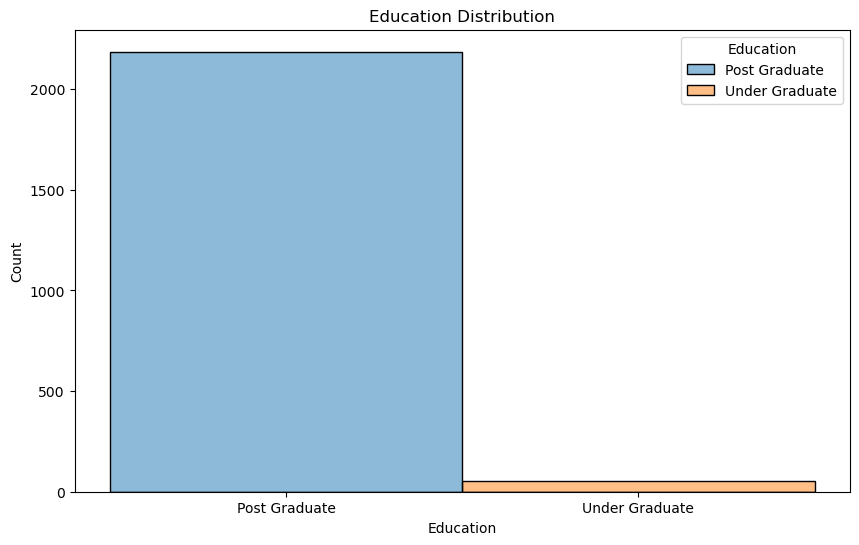

In [50]:
# Univariate Analysis of Education Feature
plt.figure(figsize=(10,6))
sns.histplot(data, x="Education", kde=True, color='skyblue', hue="Education")
plt.title('Education Distribution')
plt.show()

Most of the customers are postgraduates.

In [51]:
data.Education.value_counts()

Education
Post Graduate     2186
Under Graduate      54
Name: count, dtype: int64

#### Marital Status Feature

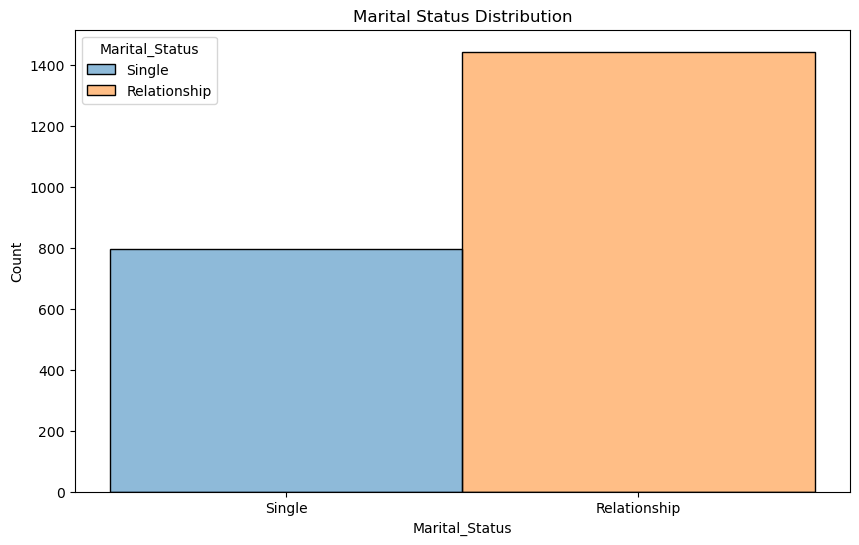

In [53]:
plt.figure(figsize=(10,6))
# Univariate Analysis of Marital_Status Feature
sns.histplot(data, x="Marital_Status", kde=True, color='skyblue', hue="Marital_Status")
plt.title('Marital Status Distribution')
plt.show()

In [54]:
data.Marital_Status.value_counts()

Marital_Status
Relationship    1444
Single           796
Name: count, dtype: int64

#### Income Feature

<Axes: xlabel='Income', ylabel='Density'>

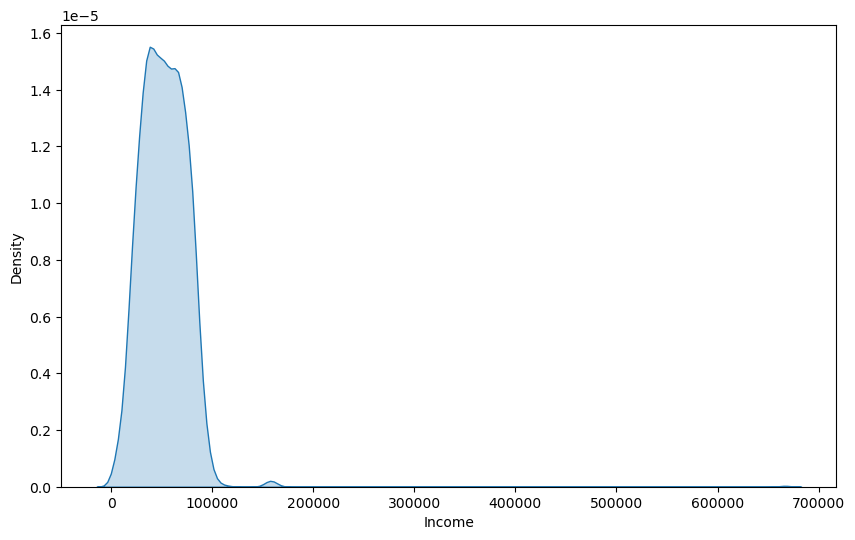

In [58]:
plt.figure(figsize=(10,6))
# Univariate Analysis of Income Feature
sns.kdeplot(data, x="Income", shade='skyblue')

Looking at the distribution of the `Income` feature, we can see some extreme outliers at > 600000. We will remove these outliers.

In [59]:
data = data[data['Income'] < 600000]

<Axes: >

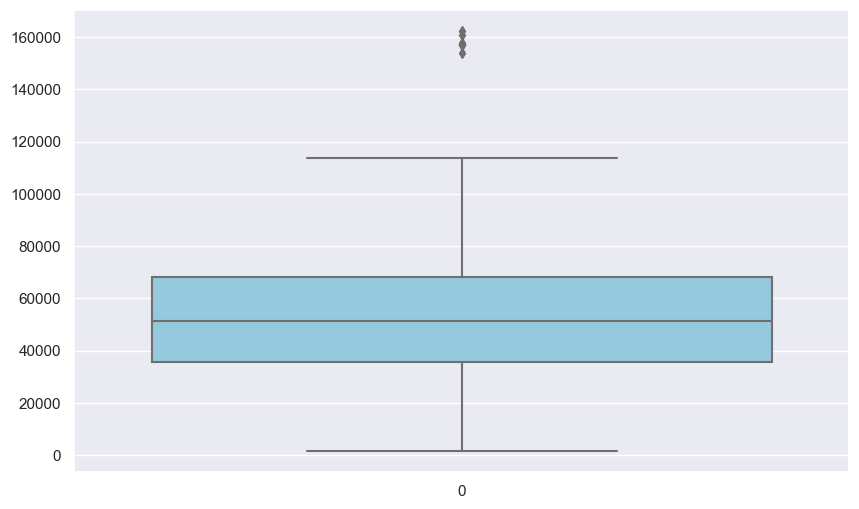

In [61]:
plt.figure(figsize=(10,6))
sns.boxplot(data['Income'], color='skyblue')

<Axes: xlabel='Income', ylabel='Count'>

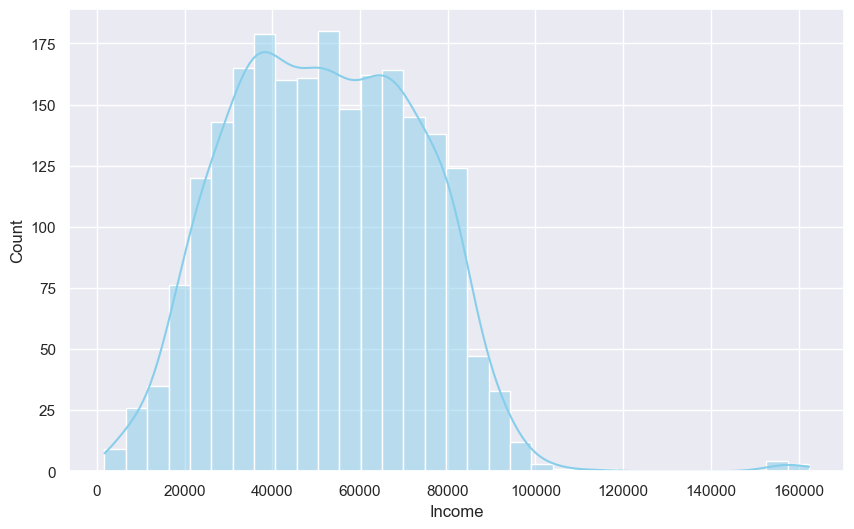

In [62]:
plt.figure(figsize=(10,6))
sns.histplot(data, x="Income", kde=True, color='skyblue')

In [63]:
# Median Income
median_income = data['Income'].median()
median_income

51381.5

<Axes: >

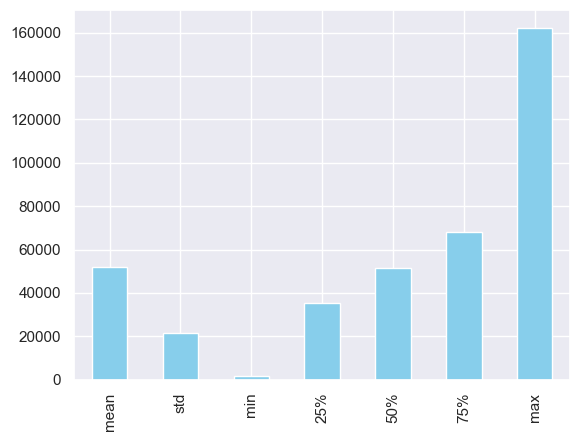

In [67]:
inc_desc = data["Income"].describe()[1:]
inc_desc.plot(kind='bar', color='skyblue')

#### Age Feature

<Axes: xlabel='Age', ylabel='Density'>

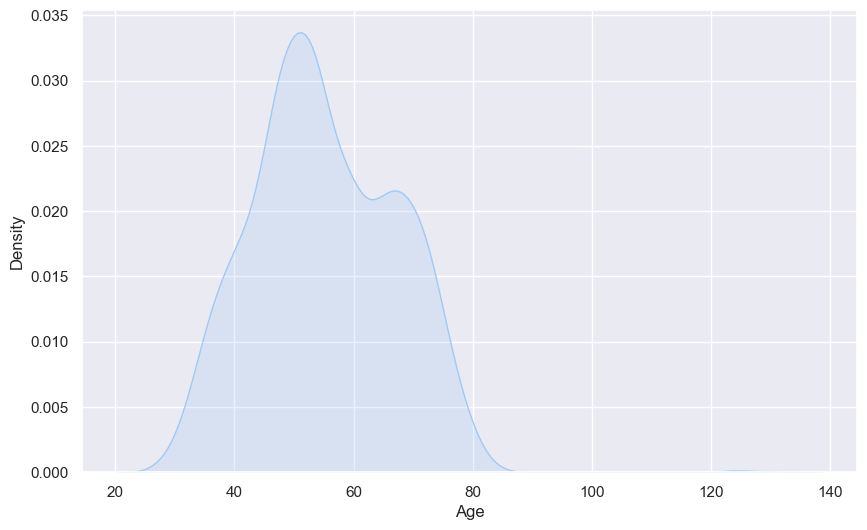

In [68]:
plt.figure(figsize=(10,6))
# Univariate Analysis of Age Feature
sns.kdeplot(data, x="Age", shade='skyblue')

In [70]:
# Median Age
median_age = data['Age'].median()
median_age

54.0

In [71]:
# Average Age
average_age = data['Age'].mean()
average_age

55.19785618579723

<Axes: >

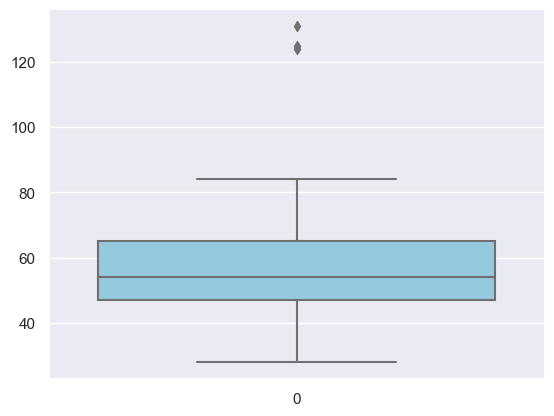

In [72]:
sns.boxplot(data['Age'], color='skyblue')

We Have some outliers in the `Age` feature. We will remove these outliers.

In [73]:
data = data[data['Age'] < 100]

#### Is_Parent Feature

<Axes: xlabel='Is_Parent', ylabel='Count'>

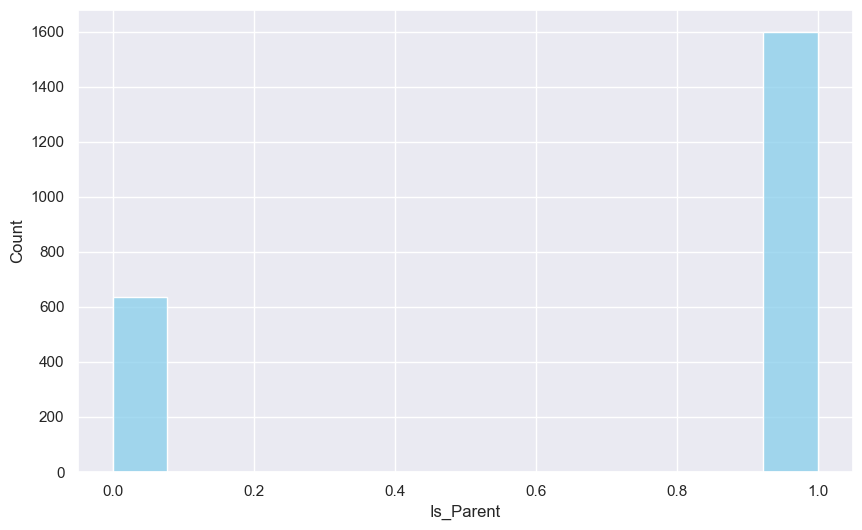

In [78]:
plt.figure(figsize=(10,6))
sns.histplot(data, x="Is_Parent", color='skyblue')

#### Children Feature

<Axes: xlabel='Children', ylabel='Count'>

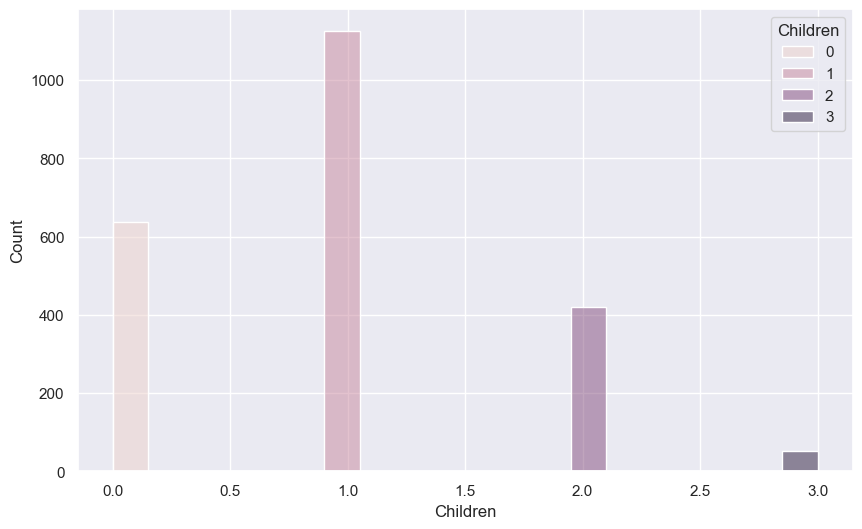

In [82]:
plt.figure(figsize=(10,6))
sns.histplot(data, x="Children", hue='Children', color='skyblue')

In [83]:
data.Children.value_counts()

Children
1    1125
0     637
2     421
3      53
Name: count, dtype: int64

#### Total_Spent Feature

<Axes: xlabel='Total_Spent', ylabel='Count'>

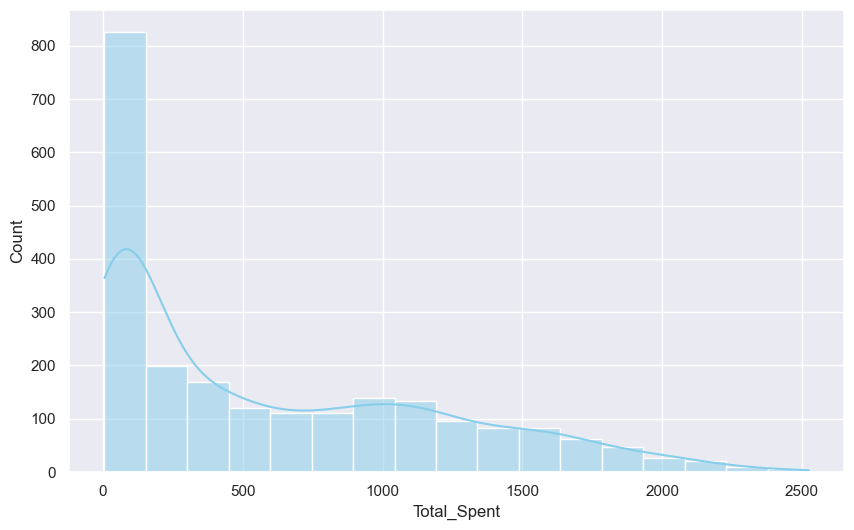

In [84]:
plt.figure(figsize=(10,6))
sns.histplot(data, x="Total_Spent", kde=True, color='skyblue')

<Axes: >

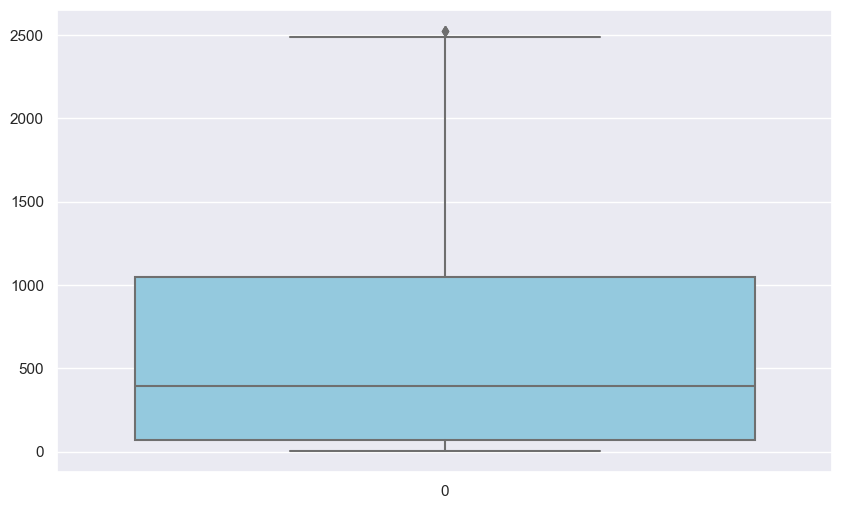

In [85]:
plt.figure(figsize=(10,6))
sns.boxplot(data['Total_Spent'], color='skyblue')

<Axes: >

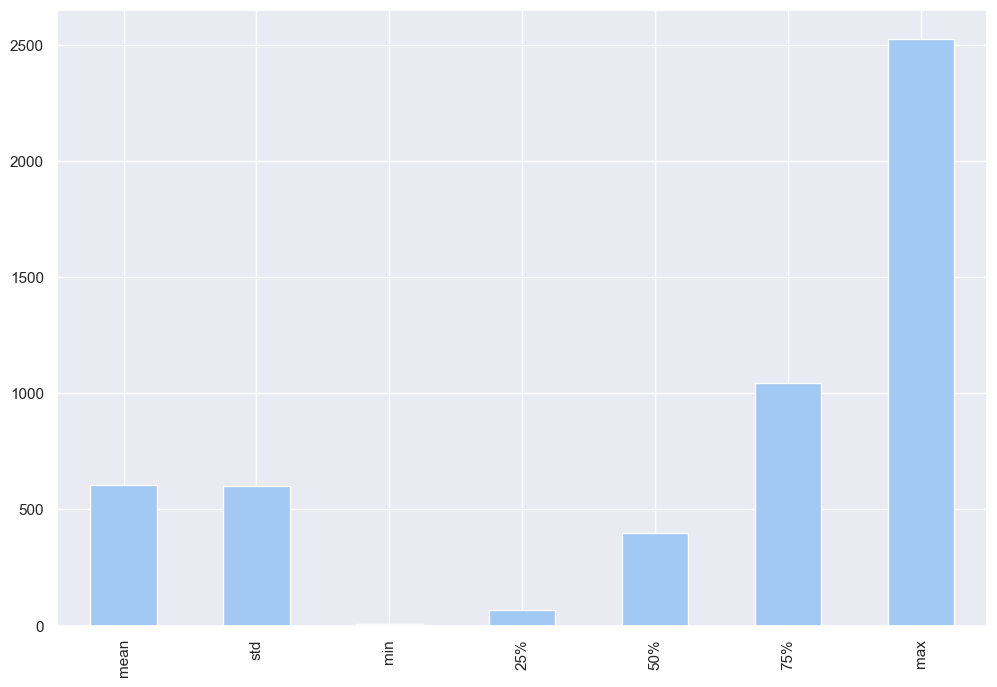

In [87]:
data["Total_Spent"].describe()[1:].plot(kind="bar", figsize=(12, 8))

In [88]:
data["Total_Spent"].describe()

count    2236.000000
mean      605.986583
std       601.865156
min         5.000000
25%        69.000000
50%       396.500000
75%      1045.500000
max      2525.000000
Name: Total_Spent, dtype: float64

#### CustomerSince Feature

In [89]:
data["CustomerSince"].unique()

array([12, 10, 11], dtype=int64)

<Axes: xlabel='CustomerSince', ylabel='Count'>

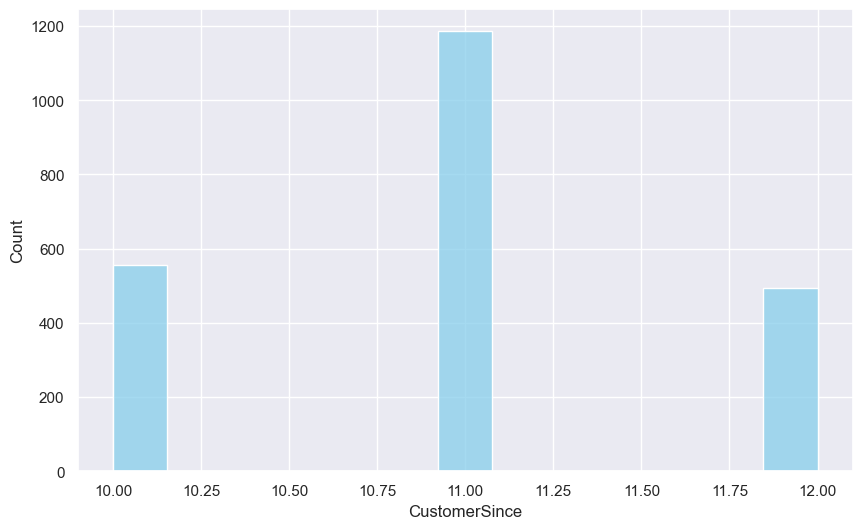

In [91]:
plt.figure(figsize=(10,6))
sns.histplot(data, x="CustomerSince", color='skyblue')

In [92]:
data["CustomerSince"].value_counts()

CustomerSince
11    1186
10     556
12     494
Name: count, dtype: int64

#### Total Amount of Purchases

<Axes: xlabel='TotalPurchases', ylabel='Count'>

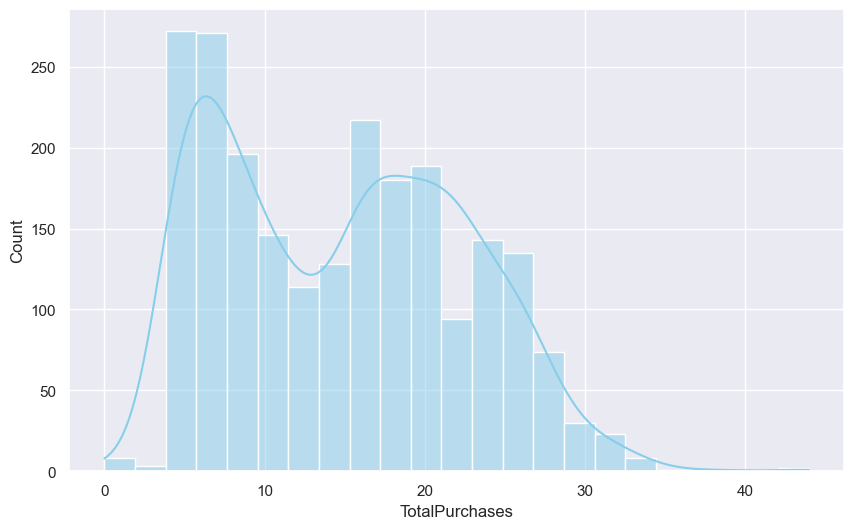

In [93]:
plt.figure(figsize=(10,6))
sns.histplot(data, x="TotalPurchases", color='skyblue', kde=True)

<Axes: >

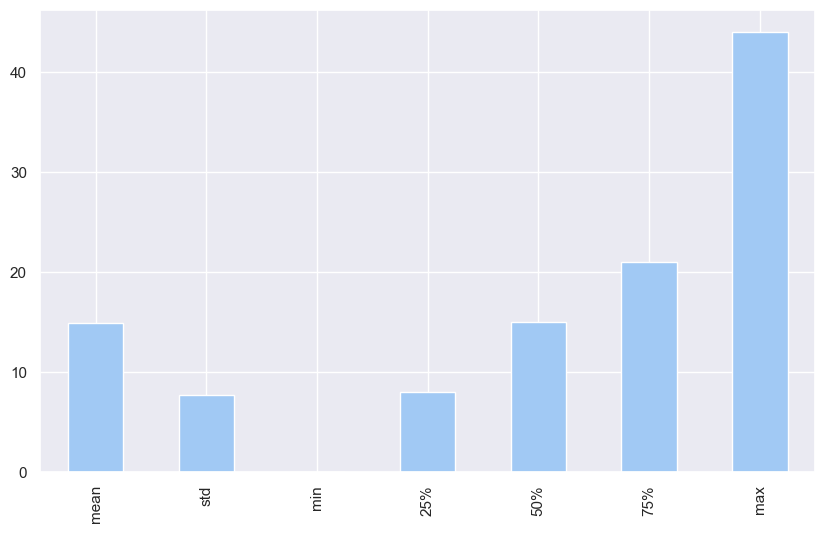

In [95]:
data["TotalPurchases"].describe()[1:].plot(kind="bar", figsize=(10, 6))

In [96]:
data["TotalPurchases"].describe()

count    2236.000000
mean       14.872540
std         7.677874
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: TotalPurchases, dtype: float64

#### Total Accepted Offers in Campaigns Feature

<Axes: xlabel='TotalAcceptedCmp', ylabel='Count'>

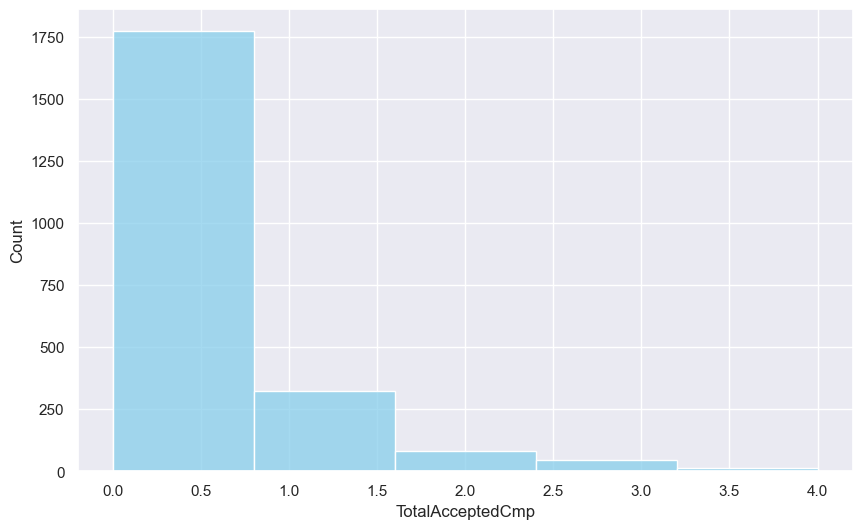

In [100]:
plt.figure(figsize=(10,6))
sns.histplot(data, x="TotalAcceptedCmp", bins=5, color='skyblue')

In [102]:
data["TotalAcceptedCmp"].value_counts()

TotalAcceptedCmp
0    1774
1     324
2      83
3      44
4      11
Name: count, dtype: int64

### FEATURE CORRELATION

<Axes: >

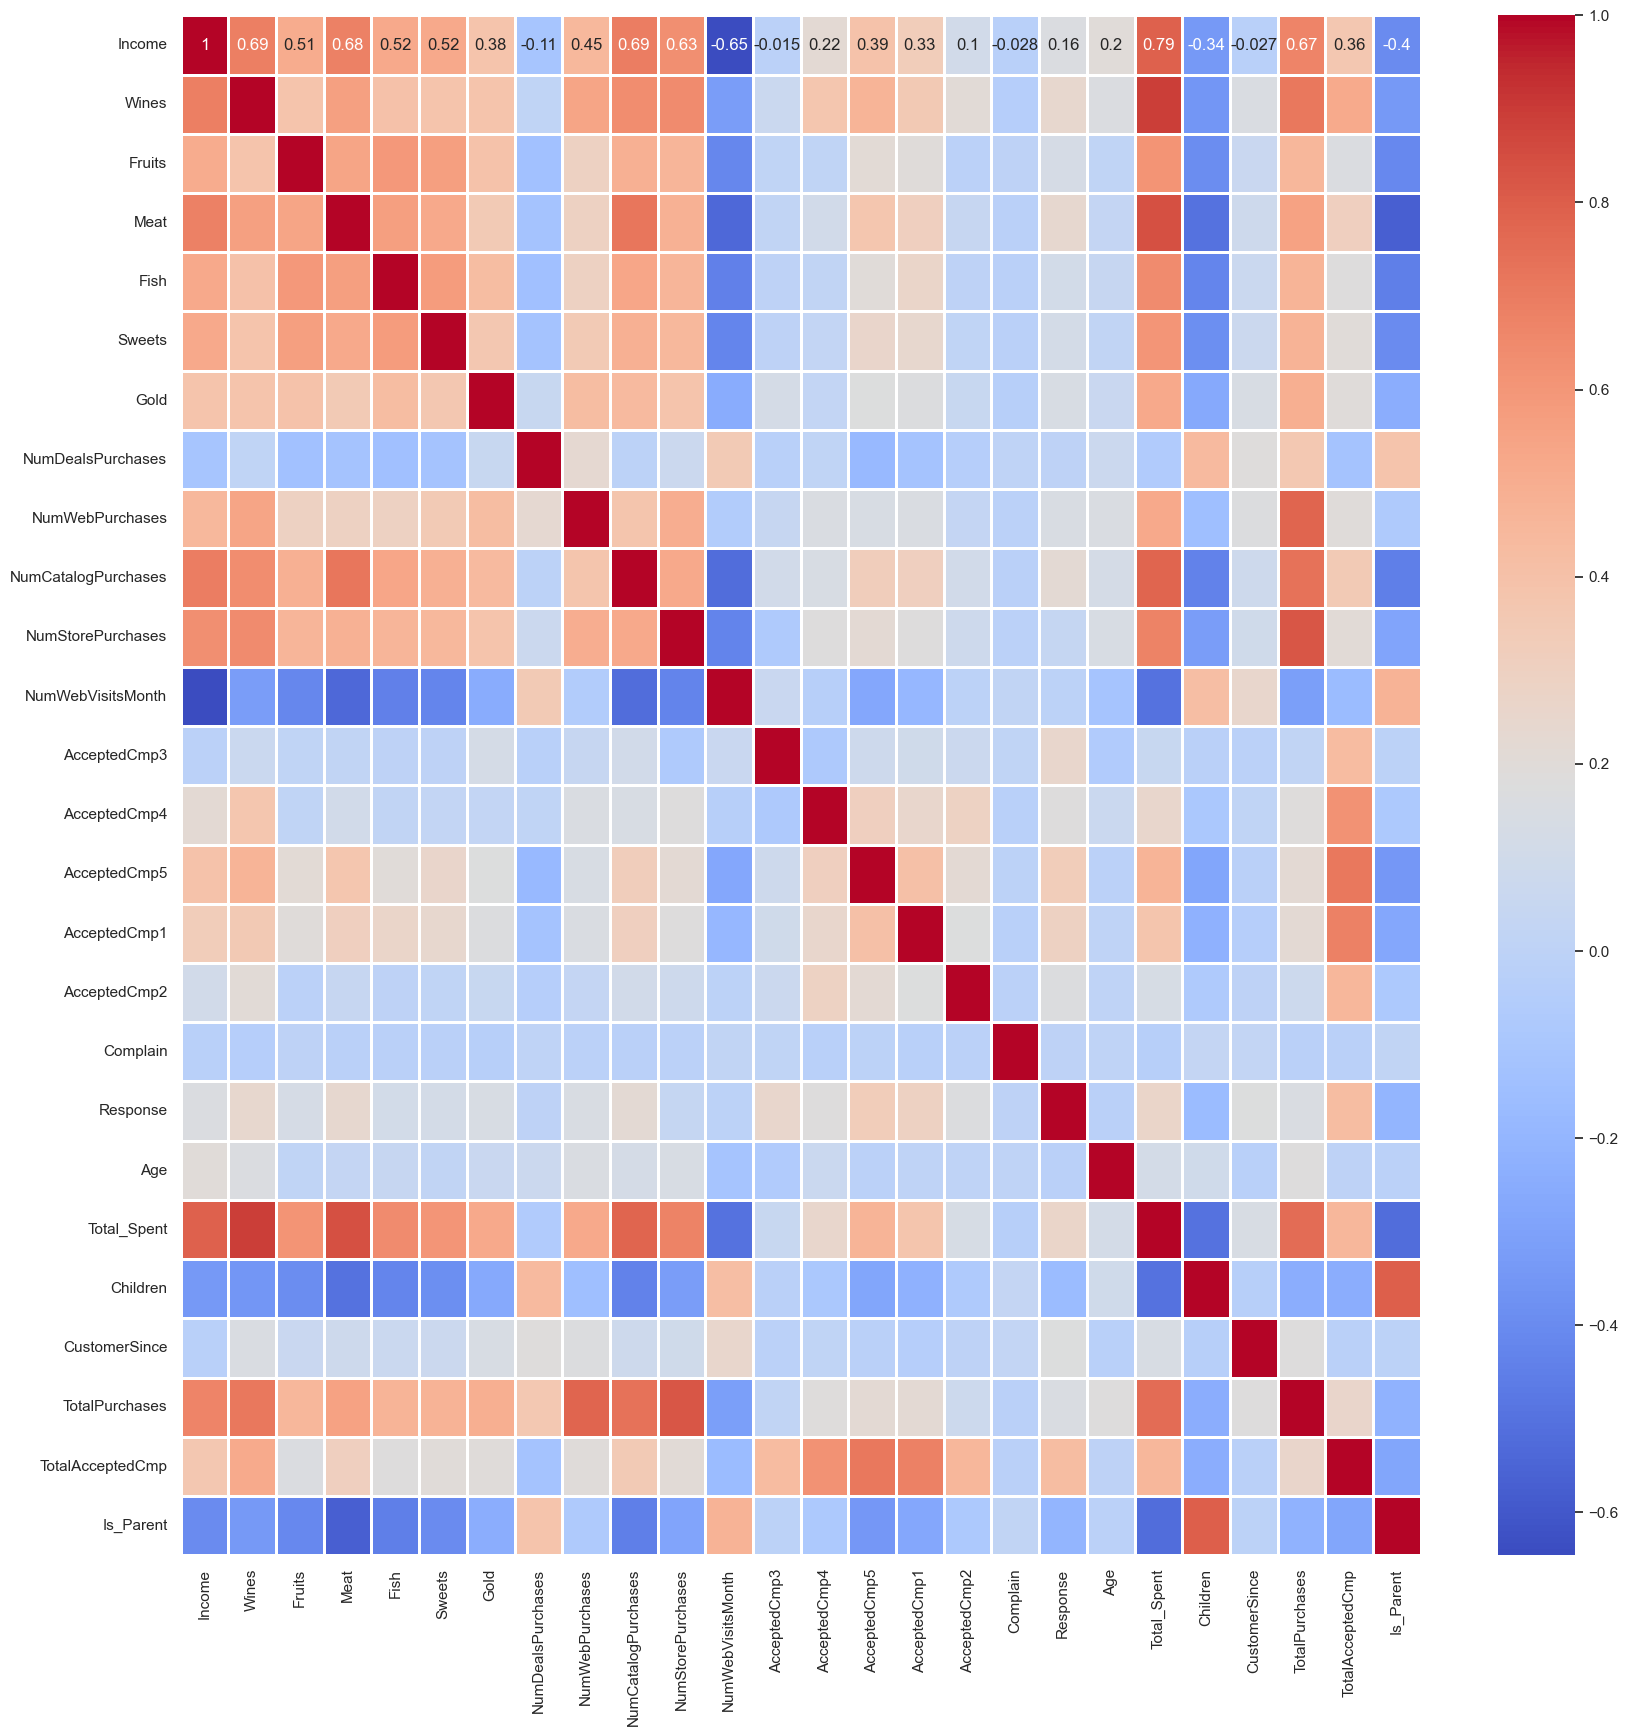

In [115]:
# Correlation Matrix without Category Features
plt.figure(figsize=(20, 20))
correlation = round(data.drop(['Recency', 'Kidhome', 'Teenhome', 'Education', 'Marital_Status'], axis=1).corr(), 3)
sns.heatmap(correlation, cmap='coolwarm', annot= True, linewidths=2)

### BIVARIATE ANALYSIS

We'll only look at the most important features for our bivariate analysis. This way, we can focus on the key relationships between our data points.


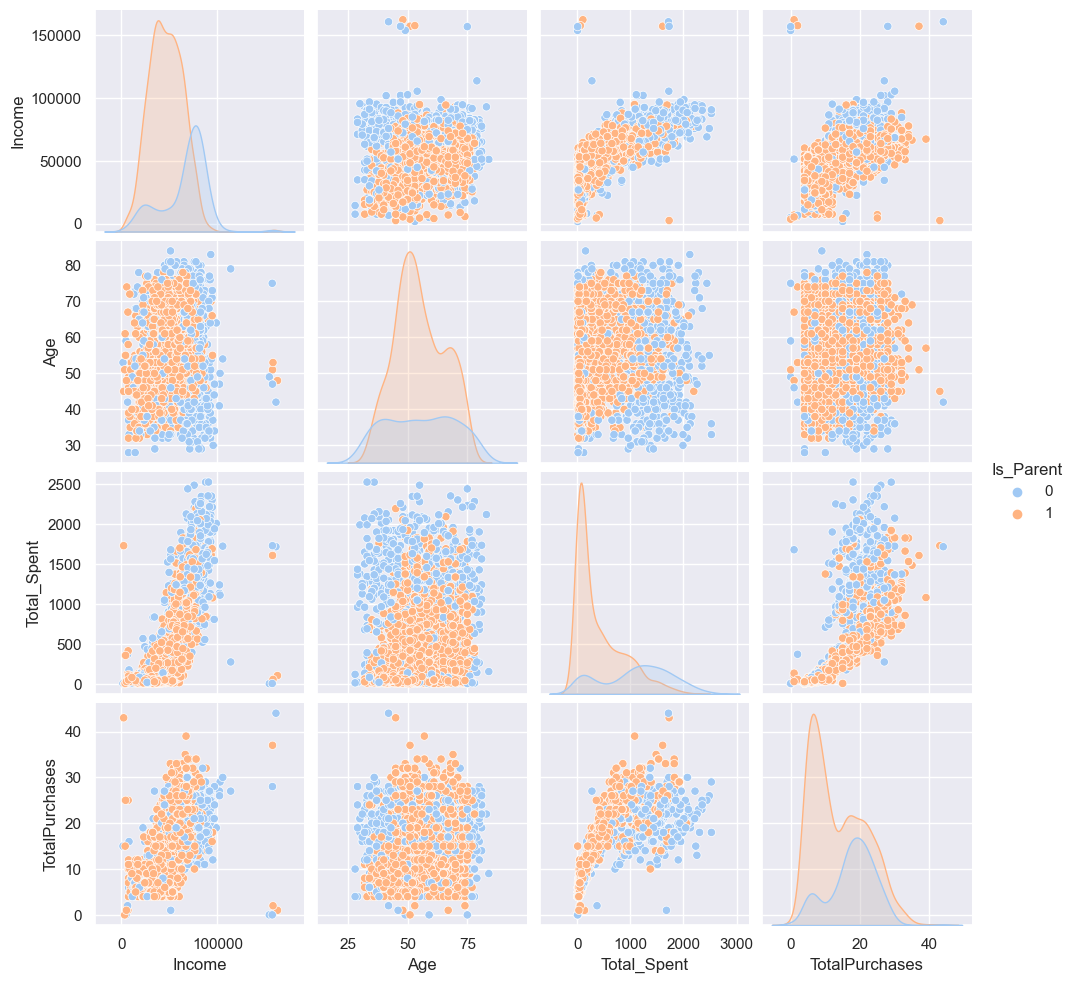

In [119]:
selectedFeatures = ['Income', 'Age', 'Total_Spent', 'TotalPurchases', 'Is_Parent']
sns.pairplot(data[selectedFeatures], kind='scatter', diag_kind='kde', hue='Is_Parent')

### OBSERVATIONS
### Key Insights from Customer Data
- The majority of customers have postgraduate qualifications. (2186 vs 54)
- A significant portion, 63%, are in relationships, while 36% are single.
- The Median income and Mean income of customers hovers around $53,000.
- The customer base primarily consists of individuals over 40 years old, with an average age of 53.
- Most customers, 72%, have children.
- The breakdown of customers with children is as follows: 1,125 with one child, 421 with two, 53 with three, and 637 without any.
- Customers typically spend about $400, but the average spending is closer to $600.
- Client loyalty is strong, with 53% having a 9-year tenure, 25% at 8 years, and 22% at 10 years.
- The Mean and median number of total purchases per customer is around 12.
- A vast majority, 80%, did not engage with promotional offers.
- Higher income correlates with increased spending.
- Customers without children tend to spend more than those with children.


### CLUSTERING

#### Dealing with Categorical Variables

We will convert the categorical variables to numerical using `LabelEncoder`.

In [120]:
data.select_dtypes(include=['object']).columns

Index(['Education', 'Marital_Status'], dtype='object')

In [121]:
# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [122]:
le = LabelEncoder()
data['Education'] = le.fit_transform(data['Education'])
data['Marital_Status'] = le.fit_transform(data['Marital_Status'])

For Education,
Postgraduate: 1
Undergraduate: 0

For Relationship,
Relationship: 0
Single: 1

#### Data Standardization

In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [125]:
scaled_data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,AcceptedCmp2,Complain,Response,Age,Total_Spent,Children,CustomerSince,TotalPurchases,TotalAcceptedCmp,Is_Parent
0,-0.157315,1.347635,0.288947,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,2.461068,...,-0.116616,-0.095001,2.386338,1.016868,1.680176,-1.264308,1.500981,1.319340,-0.438933,-1.584362
1,-0.157315,1.347635,-0.262003,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,...,-0.116616,-0.095001,-0.419052,1.273264,-0.962202,1.395139,-1.419988,-1.155857,-0.438933,0.631169
2,-0.157315,-0.742041,0.918423,-0.824939,-0.930615,-0.798467,0.362159,0.572177,-0.177201,1.344595,...,-0.116616,-0.095001,-0.419052,0.333146,0.282541,-1.264308,0.040496,0.798246,-0.438933,-1.584362
3,-0.157315,-0.742041,-1.182183,1.032627,-0.930615,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,...,-0.116616,-0.095001,-0.419052,-1.290693,-0.918994,0.065416,-1.419988,-0.895310,-0.438933,0.631169
4,-0.157315,-0.742041,0.296187,1.032627,-0.930615,1.550344,-0.389661,0.421101,-0.217088,0.154911,...,-0.116616,-0.095001,-0.419052,-1.034298,-0.305762,0.065416,-1.419988,0.537699,-0.438933,0.631169


### Reducing Dimensionality
Our dataset currently contains a substantial number of features, most of which are interrelated. To enhance our model's efficiency and prevent overfitting, we can apply dimensionality reduction techniques. This will allow us to retain only the most significant features, simplifying the dataset and reducing the computational load during model training.


In [126]:
from sklearn.decomposition import PCA

We will employ Principal Component Analysis (PCA), a linear dimensionality reduction technique. PCA effectively reduces the dataset to a lower-dimensional space by directly mapping the data in a manner that preserves maximum variance, thereby optimizing the representational efficiency of the dataset.


In [128]:
pca = PCA(n_components=3)
pca_data = pd.DataFrame(pca.fit_transform(scaled_data), columns=(["col1","col2", "col3"]))
pca_data

,col1,col2,col3
0,4.622607,0.167170,-1.225141
1,-3.145583,0.059719,0.097111
2,2.217724,-0.438249,-1.673883
3,-2.938995,-1.419163,-0.119047
4,-0.581928,0.388765,-0.721264
...,...,...,...
2231,2.220083,1.976283,-1.125659
2232,-1.187600,3.216138,2.688553
2233,2.531641,-1.230422,0.866545
2234,1.610150,1.616880,-1.186401


We reduced the dimensionality of our dataset from 31 to 3, retaining 95% of the variance.

In [129]:
import plotly.express as px

In [132]:
# 3D Scatter Plot
fig = px.scatter_3d(pca_data, x='col1', y='col2', z='col3')
fig.show()

#### Model Optimization
To determine the optimal number of clusters for our analysis, we will implement the Elbow Method. This technique will guide us in identifying the point at which the within-cluster sum of squares (WCSS) begins to diminish marginally with each additional cluster. Following this, we will apply the Bisecting K-Means clustering algorithm to partition our dataset into the identified number of clusters. This method is chosen for its efficiency in handling large datasets and its effectiveness in producing high-quality cluster separations.


In [134]:
# Importing KMeans
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

To get the optimal number of clusters for our dataset, we will utilize the Elbow Method.

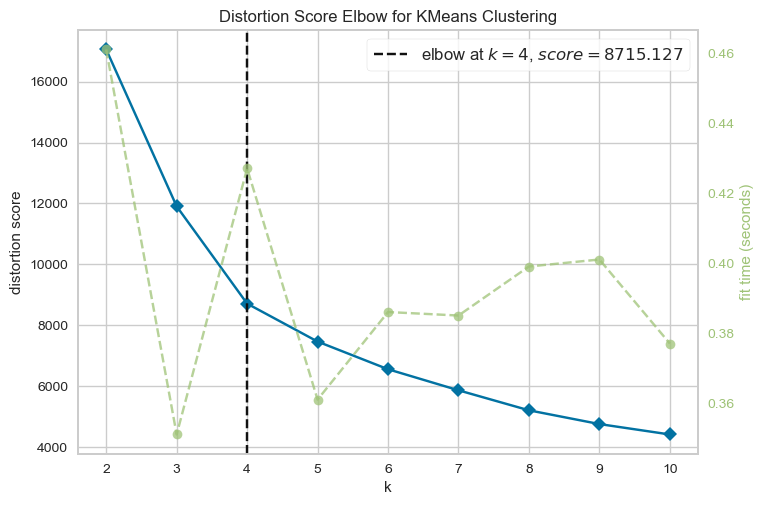

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [135]:
visualizer = KElbowVisualizer(KMeans(), k=10)
visualizer.fit(pca_data)
visualizer.show()

4 clusters is the optimal number of clusters for our dataset.

In [136]:
from sklearn.cluster import BisectingKMeans

In [139]:
# Creating an instance of the model
clusters = BisectingKMeans(n_clusters=4).fit_predict(pca_data)

In [140]:
# Join data with clusters
pca_data['Cluster'] = clusters
pca_data['Cluster'] = pca_data['Cluster'].replace([0, 1, 2, 3], [1, 2, 3, 4])

In [141]:
# 3D Scatter Plot
fig = px.scatter_3d(pca_data, x='col1', y='col2', z='col3', color='Cluster')
fig.show()

### MODEL EVALUATION

In [151]:
data['Clusters'] = clusters
data['Clusters'] = data['Clusters'].replace([0, 1, 2, 3], [1, 2, 3, 4])

<Axes: xlabel='Cluster', ylabel='Count'>

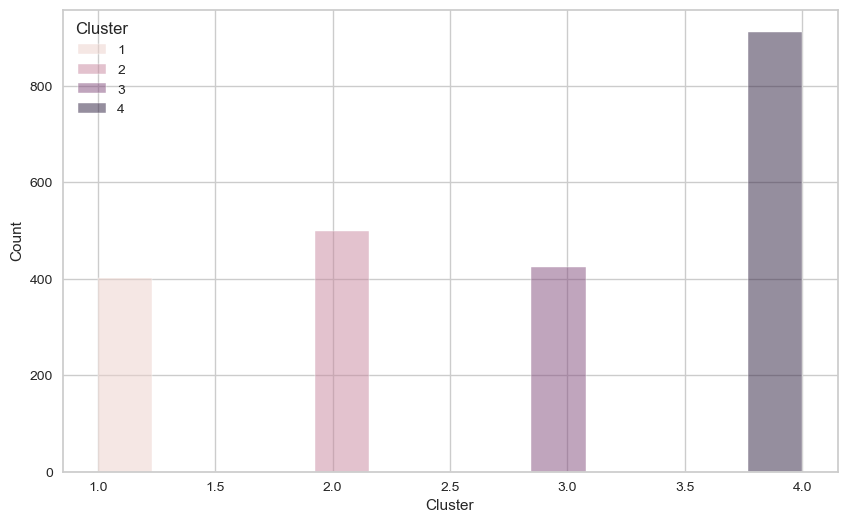

In [145]:
plt.figure(figsize=(10,6))
sns.histplot(pca_data, x="Cluster", hue='Cluster')

Fourth cluster has the most number of customers, while others are comparable.

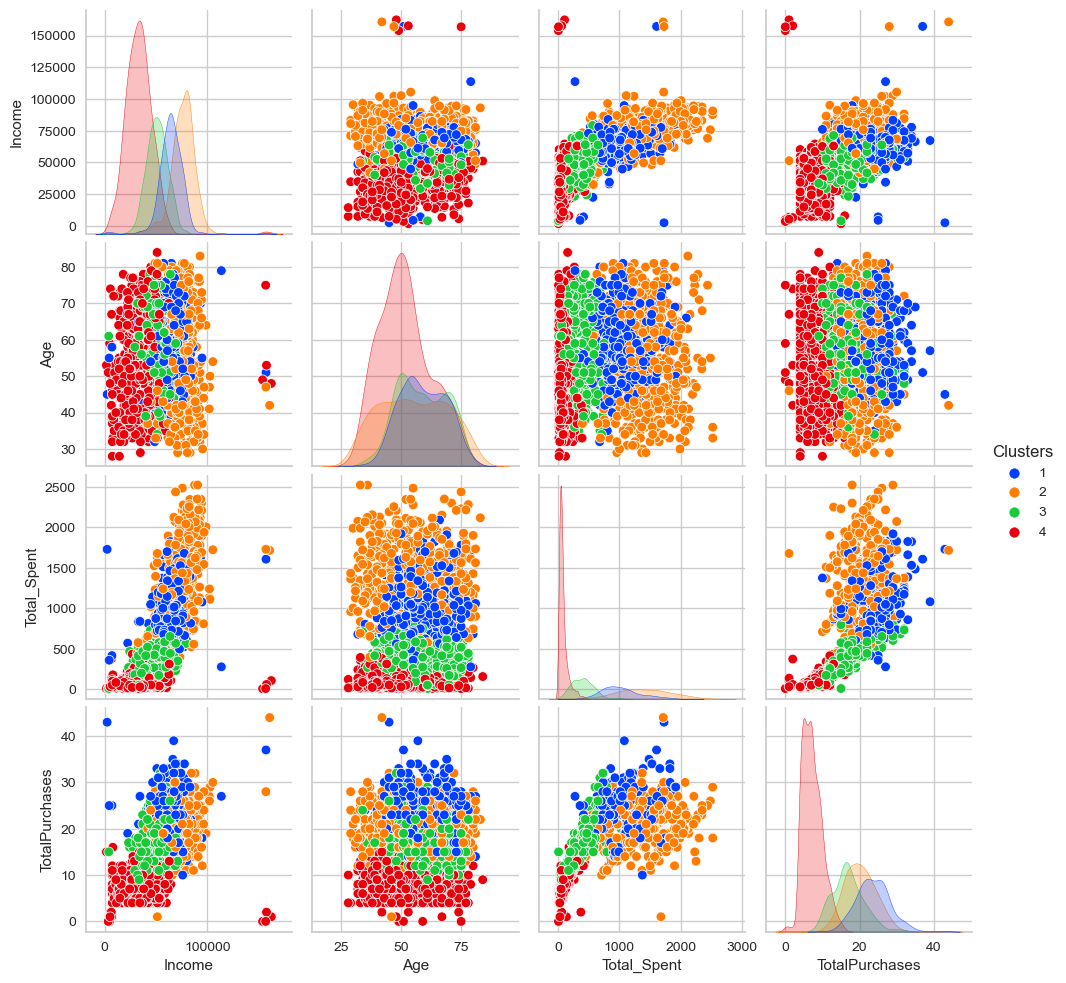

In [153]:
to_plot = ["Income" , "Age", "Total_Spent", "TotalPurchases", "Clusters"]
sns.pairplot(data[to_plot], hue="Clusters", palette="bright")

<Axes: xlabel='Income', ylabel='Count'>

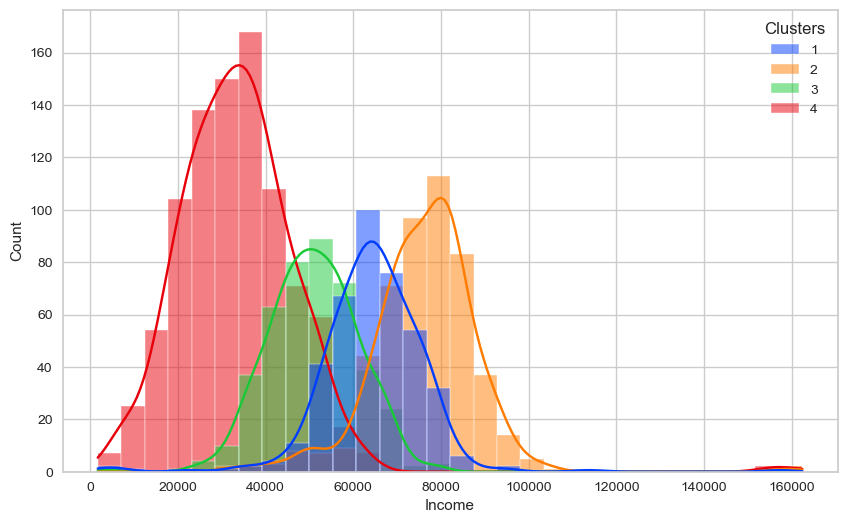

In [157]:
plt.figure(figsize=(10,6))
sns.histplot(data, x="Income", bins=30, kde=True, hue='Clusters', palette="bright")

### Cluster Income Segmentation

- **Cluster 4**: Characterized by low-income levels.
- **Cluster 3**: Represents a low to medium income bracket.
- **Cluster 2**: Distinguished by high-income levels.
- **Cluster 1**: Constitutes the medium-high income segment.


<Axes: xlabel='TotalPurchases', ylabel='Count'>

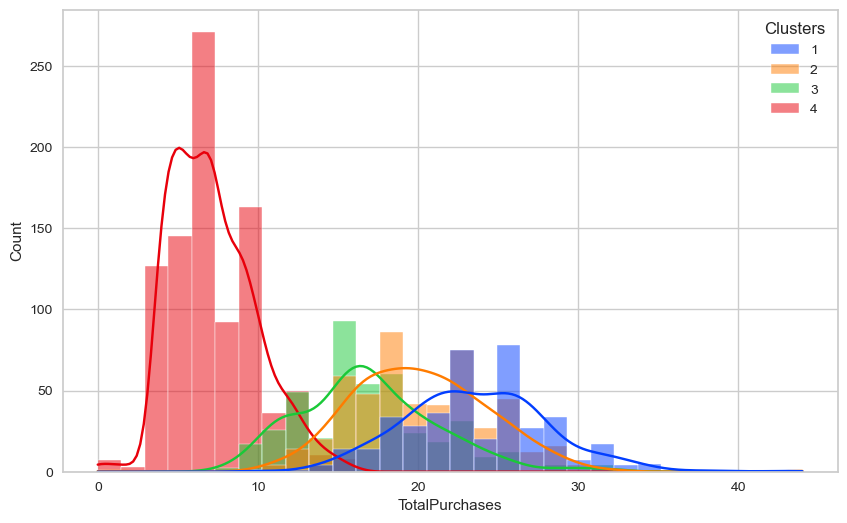

In [158]:
plt.figure(figsize=(10,6))
sns.histplot(data, x="TotalPurchases", bins=30, kde=True, hue='Clusters', palette="bright")

<Axes: xlabel='Total_Spent', ylabel='Count'>

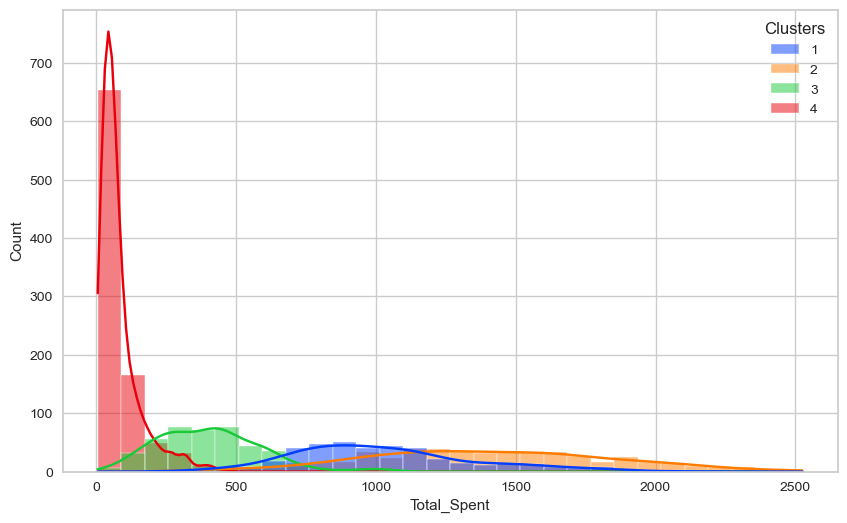

In [159]:
plt.figure(figsize=(10,6))
sns.histplot(data, x="Total_Spent", bins=30, kde=True, hue='Clusters', palette="bright")

### Cluster Spending Analysis

- **Cluster 4**: Identified with low spending habits.
- **Cluster 3**: Associated with medium spending levels.
- **Cluster 2**: Correlates with high spending tendencies.
- **Cluster 1**: Reflects medium-high spending patterns.


<Figure size 1000x600 with 0 Axes>

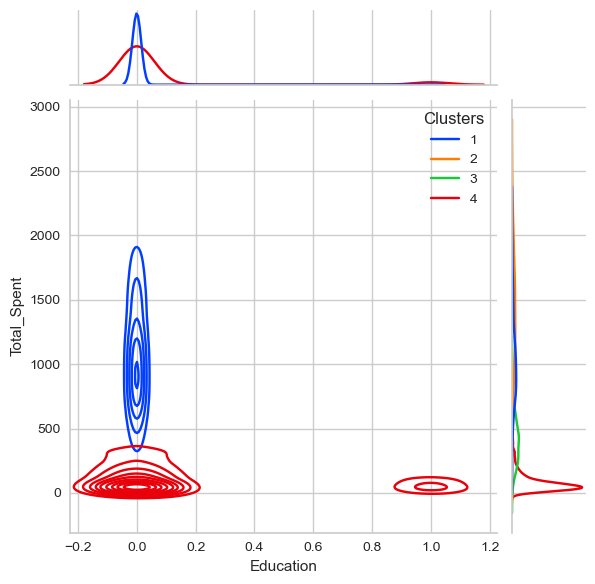

<Figure size 1000x600 with 0 Axes>

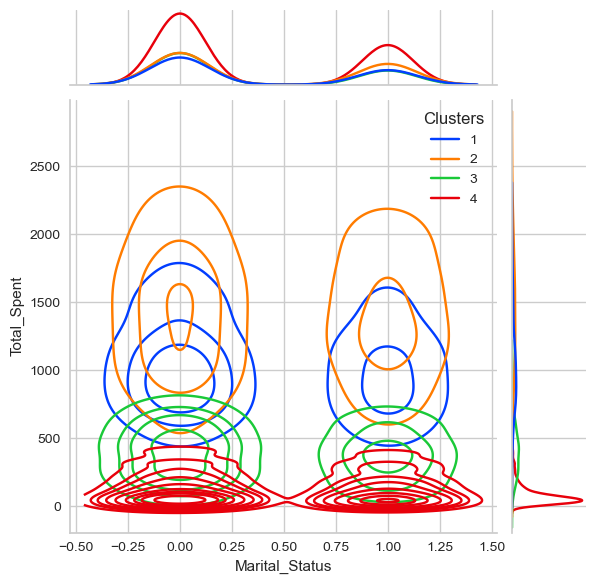

<Figure size 1000x600 with 0 Axes>

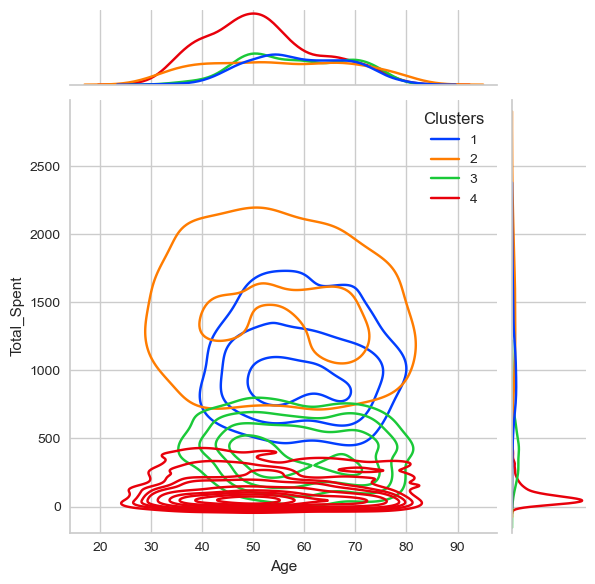

<Figure size 1000x600 with 0 Axes>

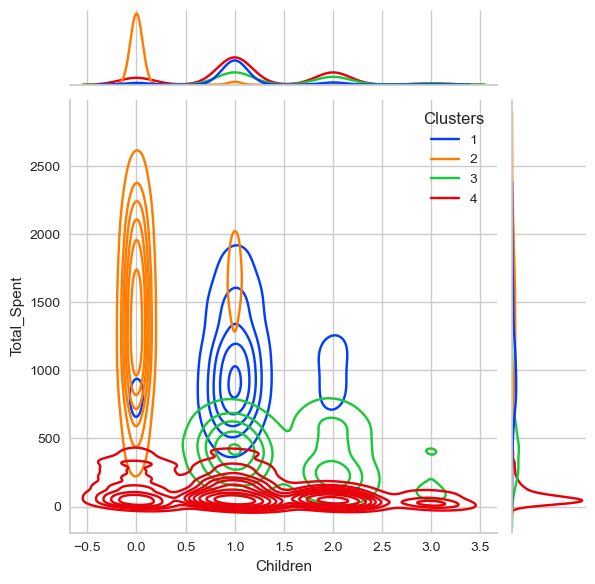

<Figure size 1000x600 with 0 Axes>

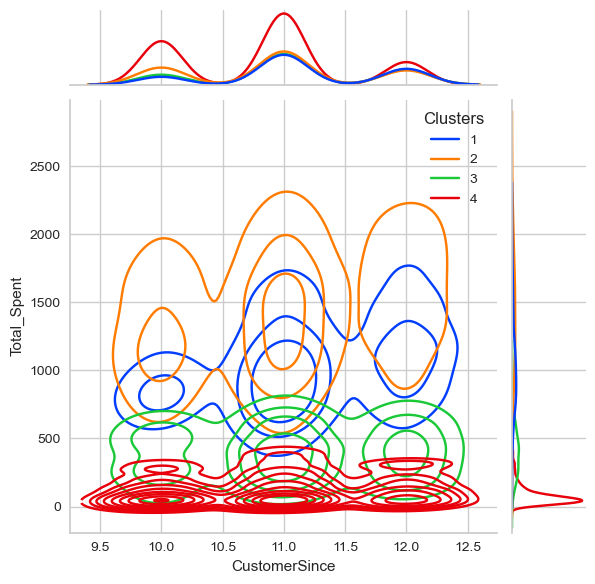

<Figure size 1000x600 with 0 Axes>

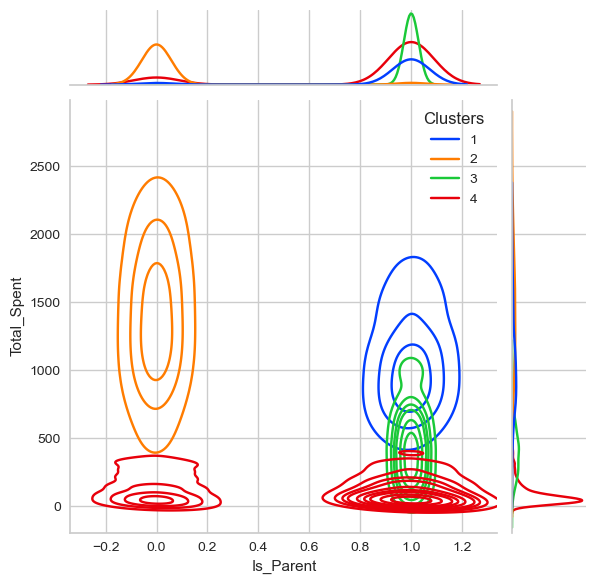

In [165]:
to_plot = ["Education", "Marital_Status", "Age", "Children", "CustomerSince", "Is_Parent"]

for feature in to_plot:
    plt.figure(figsize=(10,6))
    sns.jointplot(data=data, x=feature, y="Total_Spent", hue="Clusters", palette="bright", kind="kde")


### Clustering Summary

#### Cluster 1: The Established Patrons
- Demographics: Predominantly postgraduates, over 40 years of age, in relationships.
- Financial Profile: Medium-high income and spending levels.
- Consumer Behavior: High total purchase volume, typically parents with one child.
- Customer Tenure: Loyal customer base with 9 to 10 years of patronage.

#### Cluster 2: The Affluent Independents
- Demographics: Age-diverse, no prevailing marital status.
- Financial Profile: High income and spending levels.
- Consumer Behavior: High total purchase volume, generally not parents.
- Customer Tenure: Varied duration of engagement with the brand.

#### Cluster 3: The Steady Contributors
- Demographics: Older age group, more likely to be in a relationship, parents with one or more children.
- Financial Profile: Low to medium income bracket with corresponding spending.
- Consumer Behavior: Moderate total purchase volume.
- Customer Tenure: Consistent interaction, typically spanning 8 to 9 years.

#### Cluster 4: The Emerging Market
- Demographics: Younger cohort, more likely to have undergraduate qualifications, in relationships, parents with one or more children.
- Financial Profile: Characterized by low income and spending.
- Consumer Behavior: Lower total purchase volume.
- Customer Tenure: Predominant group with 8 to 9 years of customer history.
